In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [2]:
D = sp.symbols('D')
L_1 = sp.symbols('L1')
L_2 = sp.symbols('L2')
R_1 = sp.symbols('R1')
R_2 = sp.symbols('R2')
n_1 = sp.symbols('n')
l = sp.symbols('l')
tita = sp.symbols('\\theta')

In [3]:
matriz_cristal = sp.Matrix([[1,D/n_1],[0,1]])
matriz_n1n2 = sp.Matrix([[1,0],[0,1/n_1]])
matriz_n2n1 = sp.Matrix([[1,0],[0,n_1]])
matriz_L1 = sp.Matrix([[1,L_1],[0,1]])
matriz_L2 = sp.Matrix([[1,L_2],[0,1]])
matriz_R1 = sp.Matrix([[1,0],[-2/R_1,1]])
matriz_R2 = sp.Matrix([[1,0],[-2/R_2,1]])

In [17]:
matriz_R2*matriz_L2*matriz_n2n1*matriz_cristal*matriz_n1n2*matriz_L1*matriz_R1*matriz_L1*matriz_cristal*matriz_L2

Matrix([
[                              1 - 2*(L1 + (D/n + L2*n)/n)/R1,                                                                                                                    D*(1 - 2*(L1 + (D/n + L2*n)/n)/R1)/n + L1*(1 - 2*(L1 + (D/n + L2*n)/n)/R1) + L1 + L2*(1 - 2*(L1 + (D/n + L2*n)/n)/R1) + (D/n + L2*n)/n],
[-2/R2 - 2*(-2*L1/R2 + (-2*D/(R2*n) + n*(-2*L2/R2 + 1))/n)/R1, D*(-2/R2 - 2*(-2*L1/R2 + (-2*D/(R2*n) + n*(-2*L2/R2 + 1))/n)/R1)/n + L1*(-2/R2 - 2*(-2*L1/R2 + (-2*D/(R2*n) + n*(-2*L2/R2 + 1))/n)/R1) - 2*L1/R2 + L2*(-2/R2 - 2*(-2*L1/R2 + (-2*D/(R2*n) + n*(-2*L2/R2 + 1))/n)/R1) + (-2*D/(R2*n) + n*(-2*L2/R2 + 1))/n]])

In [18]:
R_2_x = R_2*sp.cos(tita/2)
R_2_y = R_2/sp.cos(tita/2)
matriz_cristal = sp.Matrix([[1,D/n_1],[0,1]])
matriz_n1n2 = sp.Matrix([[1,0],[0,1/n_1]])
matriz_n2n1 = sp.Matrix([[1,0],[0,n_1]])
matriz_L1 = sp.Matrix([[1,L_1],[0,1]])
matriz_L2 = sp.Matrix([[1,L_2],[0,1]])
matriz_R1 = sp.Matrix([[1,0],[0,1]])
matriz_R2_x = sp.Matrix([[1,0],[-2/R_2_x,1]])
matriz_R2_y = sp.Matrix([[1,0],[-2/R_2_y,1]])
matriz_R3 = sp.Matrix([[1,0],[0,1]])

In [19]:
camino_x = matriz_L2*matriz_R2_x*matriz_L1*matriz_cristal*matriz_cristal*matriz_L1*matriz_R2_x*matriz_L2
camino_y = matriz_L2*matriz_R2_y*matriz_L1*matriz_cristal*matriz_cristal*matriz_L1*matriz_R2_y*matriz_L2

In [20]:
(camino_x[0]+camino_x[3]).simplify().subs(tita,0)

2*(8*D*L2 - 4*D*R2 + 8*L1*L2*n - 4*L1*R2*n - 4*L2*R2*n + R2**2*n)/(R2**2*n)

In [4]:
R_2_x = R_2*sp.cos(tita/2)
R_2_y = R_2/sp.cos(tita/2)
matriz_cristal = sp.Matrix([[1,D/n_1],[0,1]])
matriz_L1 = sp.Matrix([[1,L_1],[0,1]])
matriz_L2 = sp.Matrix([[1,L_2-l],[0,1]])
matriz_l = sp.Matrix([[1,l],[0,1]])
matriz_R1 = sp.Matrix([[1,0],[0,1]])
matriz_R2_x = sp.Matrix([[1,0],[-2/R_2_x,1]])
matriz_R2_y = sp.Matrix([[1,0],[-2/R_2_y,1]])
matriz_R3 = sp.Matrix([[1,0],[0,1]])

In [6]:
matriz_R2_y

Matrix([
[                  1, 0],
[-2*cos(\theta/2)/R2, 1]])

In [22]:
camino_x = matriz_l*matriz_l*matriz_L2*matriz_R2_x*matriz_L1*matriz_cristal*matriz_cristal*matriz_L1*matriz_R2_x*matriz_L2
camino_y = matriz_l*matriz_l*matriz_L2*matriz_R2_y*matriz_L1*matriz_cristal*matriz_cristal*matriz_L1*matriz_R2_y*matriz_L2

In [24]:
cD = 2
cn_1 = 1.958
cR_2= 250
cL_2= 250
cL_1= 200
ctita= 50*3.14/180

In [25]:
def w(ll, camino, cD, cn_1, cR_2, cL_2, cL_1, ctita, lamnda=0.001064,n=1):
    AA,BB,CC,DD= sp.simplify(camino.subs([(D,cD),(n_1,cn_1),(R_2,cR_2),(L_1,cL_1),(L_2,cL_2),(tita,ctita)]))
    AA = float(AA.subs(l,ll))
    BB = float(BB.subs(l,ll))
    CC = float(CC.subs(l,ll))
    DD = float(DD.subs(l,ll))
    result_1 =np.sqrt(lamnda/(np.pi*n))
    result_2 =np.sqrt(abs(BB))/((1-((DD+AA)**2)/4)**(1/4))
    return result_1*result_2

In [27]:
wx_t, wy_t= [],[]
for i in range(49,50):
    ctita= i*3.14/180
    ll = np.linspace(1,200, 200)
    wx = []
    wy = []
    for lll in ll:
        wx.append(w(lll, camino_x, cD, cn_1, cR_2, cL_2, cL_1, ctita))
        wy.append(w(lll, camino_y, cD, cn_1, cR_2, cL_2, cL_1, ctita))
    wx_t.append(wx)
    wy_t.append(wy)    

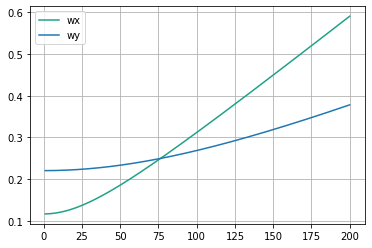

In [39]:
color = col.to_hex(viridis(0.5+n))
plt.plot(ll,wx, color,label="wx")
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [37]:
(i-17) ->0
24 ->1

In [45]:
(17-24)/25

-0.28

In [ ]:
(i-17)*0.141

In [46]:
1/7

0.14285714285714285

In [12]:
from ipywidgets import interactive
%matplotlib inline

In [47]:
def w(ll, AA,BB,CC,DD, lamnda=0.001064,n=1):
    AA = float(AA.subs(l,ll))
    BB = float(BB.subs(l,ll))
    CC = float(CC.subs(l,ll))
    DD = float(DD.subs(l,ll))
    result_1 =np.sqrt(lamnda/(np.pi*n))
    result_2 =np.sqrt(abs(BB))/((1-((DD+AA)**2)/4)**(1/4))
    return result_1*result_2

In [74]:
cD = 2
cn_1 = 1.958
cR_2= 250
cL_2= 200
cL_1= 200
ctita= 50*3.14/180

In [78]:
wx_t, wy_t= [],[]
for i in range(34,50):
    ctita= i*3.14/180
    ll = np.linspace(1,200, 200)
    wx = []
    wy = []
    AA_x,BB_x,CC_x,DD_x= sp.simplify(camino_x.subs([(D,cD),(n_1,cn_1),(R_2,cR_2),(L_1,cL_1),(L_2,cL_2),(tita,ctita)]))
    AA_y,BB_y,CC_y,DD_y= sp.simplify(camino_y.subs([(D,cD),(n_1,cn_1),(R_2,cR_2),(L_1,cL_1),(L_2,cL_2),(tita,ctita)]))
    for lll in ll:
        wx.append(w(lll, AA_x,BB_x,CC_x,DD_x))
        wy.append(w(lll, AA_y,BB_y,CC_y,DD_y))
    wx_t.append(wx)
    wy_t.append(wy)    

In [79]:
def graficar(wx,wy):
    plt.figure(2)
    plt.plot(ll,wx,label="wx-wy")
    plt.plot(ll,wy,label="w-wy") 
    plt.plot(ll,abs(np.array(wy)-np.array(wx)),label="w-wy") 
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

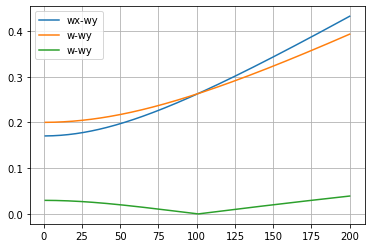

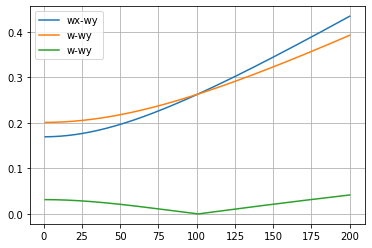

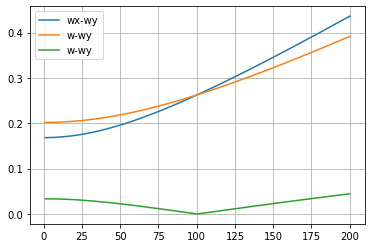

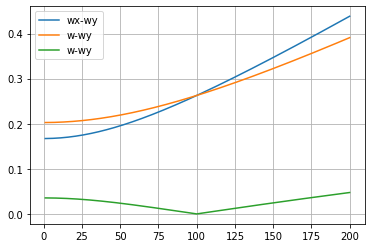

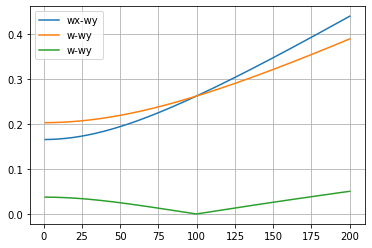

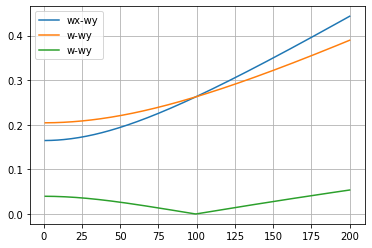

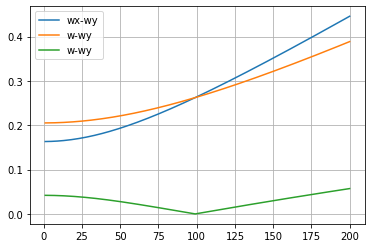

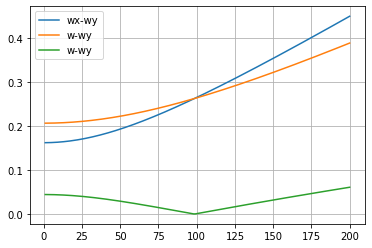

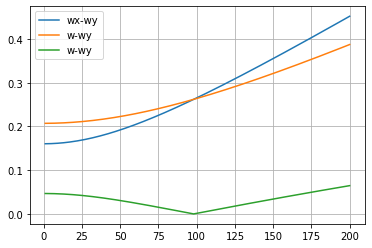

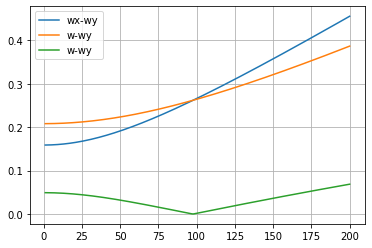

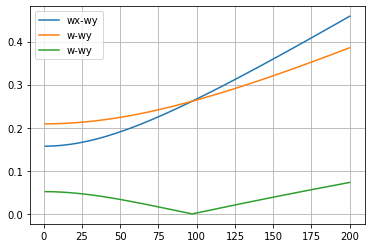

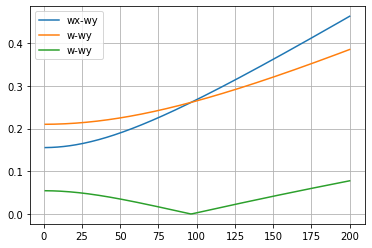

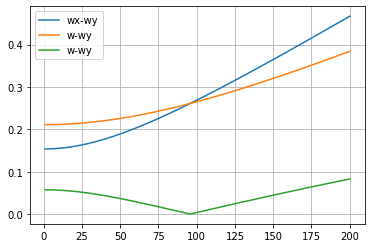

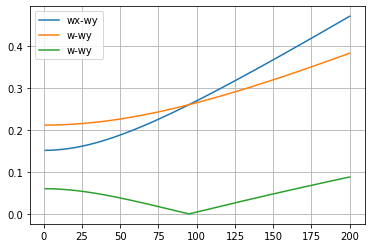

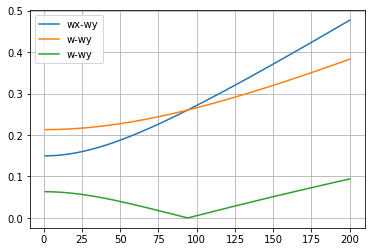

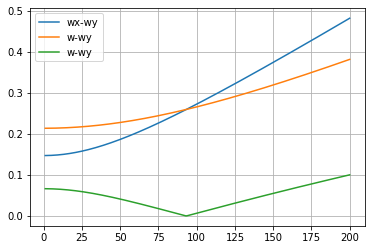

In [80]:
for i in range(len(wx_t)):
    graficar(wx_t[i],wy_t[i])

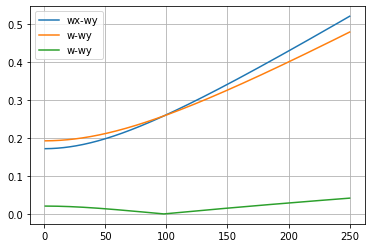

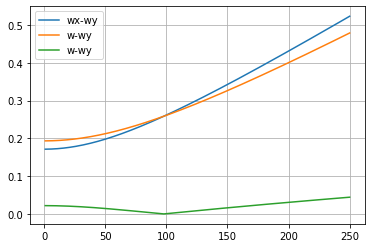

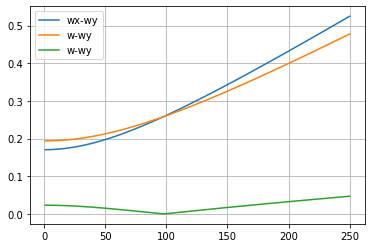

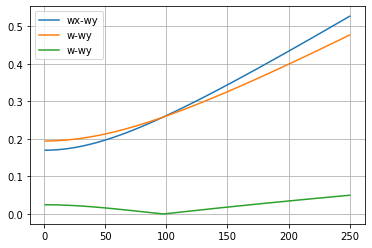

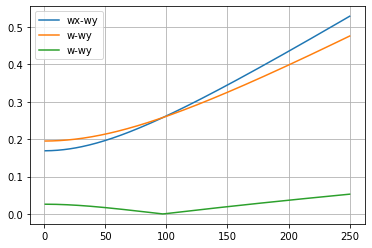

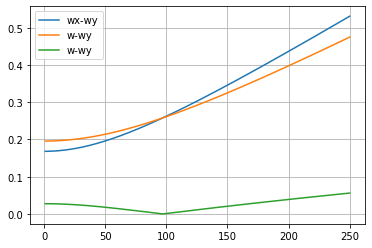

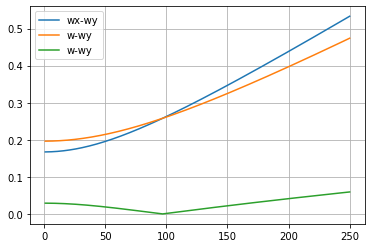

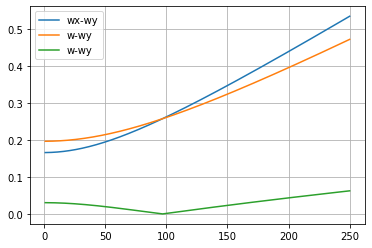

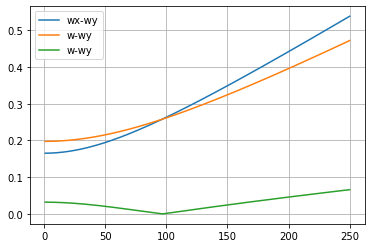

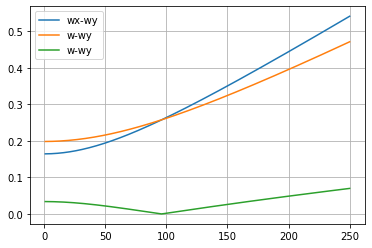

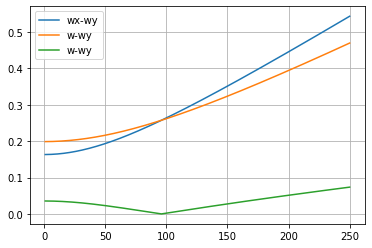

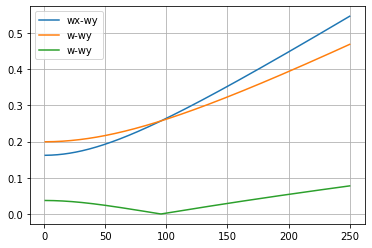

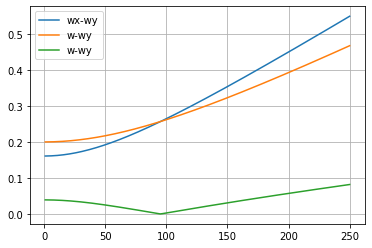

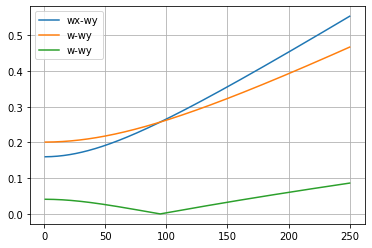

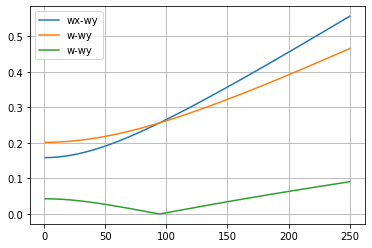

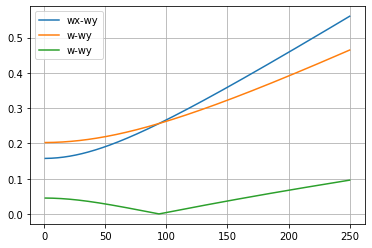

In [73]:
for i in range(len(wx_t)):
    graficar(wx_t[i],wy_t[i])

In [26]:
from matplotlib.colors import  ListedColormap


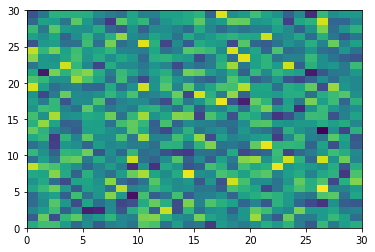

In [34]:
from matplotlib import cm
data = np.random.randn(30, 30)
viridis = cm.get_cmap('viridis', 1000)
plt.pcolormesh(data,cmap=viridis)

In [37]:
data.max()
-0.484235

2.6763204061710537

In [3]:
archivo = open("prueba.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'prueba.csv'

In [4]:
import os

In [11]:
for i in os.scandir('./'):
    print(i)

<DirEntry 'cavidad v.rez'>
<DirEntry 'cavidad v_20cm.rez'>
<DirEntry 'cavidad_simple_ejemplo_2.rez'>
<DirEntry '.ipynb_checkpoints'>
<DirEntry 'Simulacion.ipynb'>
